In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import data_preprocess
import warnings

In [15]:
warnings.filterwarnings("ignore")

In [16]:
male_matches = pd.read_csv("data/all_male_matches.csv")
female_matches = pd.read_csv("data/all_female_matches.csv")

male_df = data_preprocess.merge_dataset_total(male_matches, "male")
female_df = data_preprocess.merge_dataset_total(female_matches, "female")

## Neural Network

### Female

In [38]:
X, y = data_preprocess.get_features_target(female_df)
np_y = y.to_numpy()
np_y_one_hot = tf.one_hot(np_y, 2).numpy()

X_train, X_test, y_train, y_test = train_test_split(X, np_y_one_hot, test_size=0.15, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]

history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, validation_split=0.15)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

Epoch 1/10
    3/10510 [..............................] - ETA: 5:28 - loss: 3725.2664 - accuracy: 0.3854 

2023-05-18 01:48:06.155409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10510/10510 [==============================] - ETA: 0s - loss: 38.4470 - accuracy: 0.6414

2023-05-18 01:49:43.736498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10510/10510 [==============================] - 110s 10ms/step - loss: 38.4470 - accuracy: 0.6414 - val_loss: 6.3677 - val_accuracy: 0.7190
Epoch 2/10
10510/10510 [==============================] - 108s 10ms/step - loss: 9.6367 - accuracy: 0.6623 - val_loss: 3.0890 - val_accuracy: 0.5462
Epoch 3/10
10510/10510 [==============================] - 109s 10ms/step - loss: 7.8794 - accuracy: 0.6827 - val_loss: 2.4256 - val_accuracy: 0.7185
Epoch 4/10
10510/10510 [==============================] - 107s 10ms/step - loss: 6.3479 - accuracy: 0.6881 - val_loss: 13.9337 - val_accuracy: 0.6777
Epoch 5/10
10510/10510 [==============================] - 107s 10ms/step - loss: 4.0988 - accuracy: 0.6928 - val_loss: 3.0339 - val_accuracy: 0.6635


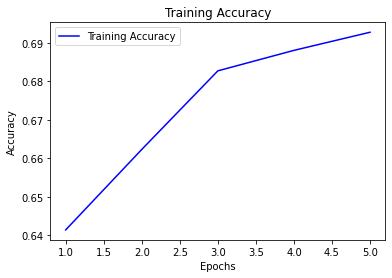

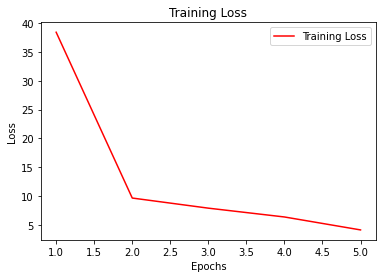

In [41]:
# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Male

In [29]:
X, y = data_preprocess.get_features_target(male_df)
np_y = y.to_numpy()
np_y_one_hot = tf.one_hot(np_y, 2).numpy()

X_train, X_test, y_train, y_test = train_test_split(X, np_y_one_hot, test_size=0.15, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-05-18 01:30:57.615638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-18 01:30:57.617377: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [30]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)]

history = model.fit(X_train, y_train, epochs=10, callbacks=callbacks, validation_split=0.15)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)


2023-05-18 01:31:01.542427: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2023-05-18 01:31:01.750009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13753/13753 [==============================] - ETA: 0s - loss: 33.8340 - accuracy: 0.6418

2023-05-18 01:33:10.503215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13753/13753 [==============================] - 144s 10ms/step - loss: 33.8340 - accuracy: 0.6418 - val_loss: 32.3746 - val_accuracy: 0.6562
Epoch 2/10
13753/13753 [==============================] - 129s 9ms/step - loss: 10.0598 - accuracy: 0.6578 - val_loss: 8.1754 - val_accuracy: 0.5378
Epoch 3/10
13753/13753 [==============================] - 148s 11ms/step - loss: 7.7110 - accuracy: 0.6517 - val_loss: 8.4403 - val_accuracy: 0.6333
Epoch 4/10
13753/13753 [==============================] - 147s 11ms/step - loss: 5.5327 - accuracy: 0.6509 - val_loss: 5.3923 - val_accuracy: 0.6556
Epoch 5/10
13753/13753 [==============================] - 138s 10ms/step - loss: 2.1801 - accuracy: 0.6517 - val_loss: 0.6458 - val_accuracy: 0.6524
Epoch 6/10
13753/13753 [==============================] - 136s 10ms/step - loss: 0.6461 - accuracy: 0.6522 - val_loss: 0.6461 - val_accuracy: 0.6524
Epoch 7/10
13753/13753 [==============================] - 136s 10ms/step - loss: 0.6461 - accuracy: 0.6522 - val_lo

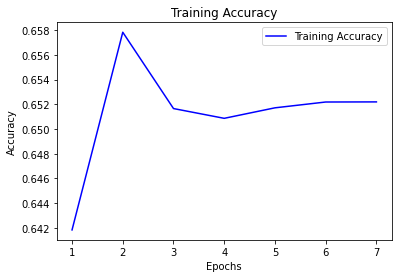

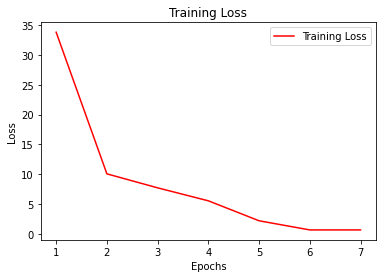

In [31]:
# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Decesion tree

### Female

In [32]:
X, y = data_preprocess.get_features_target(female_df)

In [33]:
np_y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, np_y, test_size=0.15, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9558143198842722


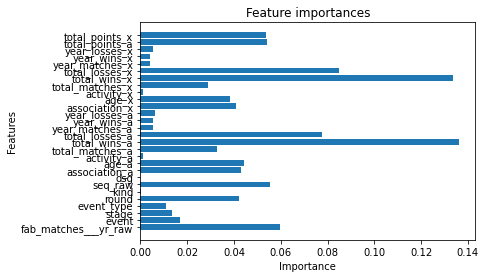

In [34]:
importances = clf.feature_importances_

plt.title('Feature importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.show()

### Male

In [35]:
X, y = data_preprocess.get_features_target(male_df)

In [36]:
np_y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, np_y, test_size=0.15, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9538121401834381


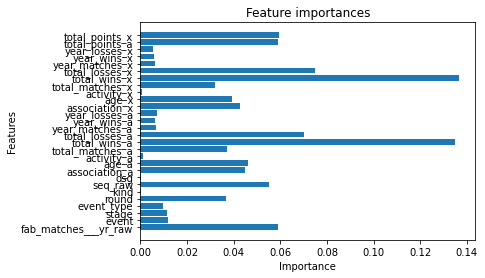

In [37]:
importances = clf.feature_importances_

plt.title('Feature importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.show()